<a href="https://colab.research.google.com/github/SamridhiParihar/Machine-Learning-Projects/blob/main/Histogram_equilization_and_strectching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

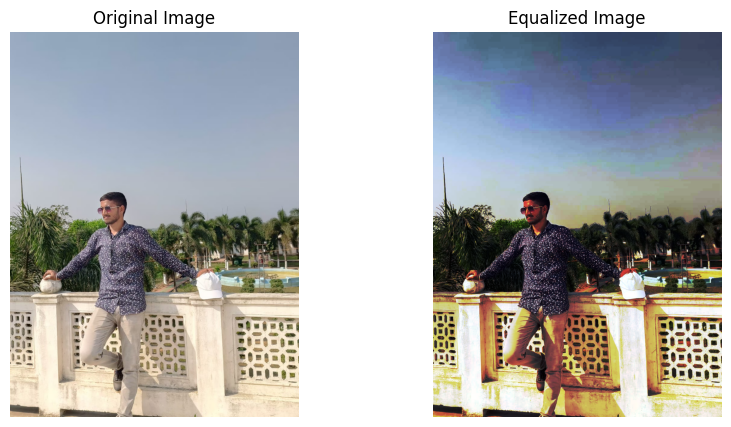

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Split the colored image into its RGB channels
    r, g, b = cv2.split(image)

    # Apply histogram equalization to each channel
    equalized_r = cv2.equalizeHist(r)
    equalized_g = cv2.equalizeHist(g)
    equalized_b = cv2.equalizeHist(b)

    # Merge the equalized channels back to form the colored image
    equalized_image = cv2.merge([equalized_r, equalized_g, equalized_b])

    return equalized_image


image = cv2.imread('/content/re.jpeg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply histogram equalization to the colored image
equalized_image = histogram_equalization(image)

equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

# Display original and equalized images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(equalized_image_rgb)
axes[1].set_title('Equalized Image')
axes[1].axis('off')
plt.show()

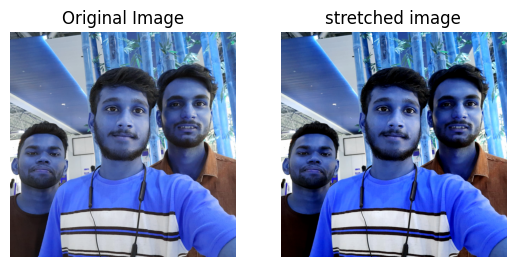

In [ ]:
def contrast_stretch(image, percentage):
    # Calculate the lower and upper percentiles based on the given percentage
    lower_percentile = (100 - percentage) / 2
    upper_percentile = 100 - lower_percentile

    # Calculate the pixel values at the lower and upper percentiles
    lower_pixel_value = np.percentile(image, lower_percentile)
    upper_pixel_value = np.percentile(image, upper_percentile)

    # Apply contrast stretch using the lower and upper pixel values
    stretched_image = np.clip(image, lower_pixel_value, upper_pixel_value)

    # Normalize the pixel values to the full range of 0-255
    stretched_image = (stretched_image - lower_pixel_value) * (255.0 / (upper_pixel_value - lower_pixel_value))

    return stretched_image.astype(np.uint8)

# Load the input image
image = cv2.imread('/content/re2.jpeg')

# Apply percentage contrast stretch with a stretch percentage of 5%
stretched_image = contrast_stretch(image, percentage=90)

# Display the original and stretched images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title("Original Image")

axes[1].imshow(stretched_image)
axes[1].axis('off')
axes[1].set_title("stretched image")

plt.show()